## Section 4: Bayesian Regression
xxx

In [84]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc3 as pm
import scipy
import scipy.stats as stats
import seaborn.apionly as sns
import statsmodels.api as sm
import theano.tensor as tt

from sklearn import preprocessing

%matplotlib inline
plt.style.use('bmh')
colors = ['#348ABD', '#A60628', '#7A68A6', '#467821', '#D55E00', 
          '#CC79A7', '#56B4E9', '#009E73', '#F0E442', '#0072B2']

messages = pd.read_csv('data/hangout_chat_data.csv')

### Fixed effects regression
xxx

In [85]:
X = messages[['is_weekend','day_of_week','message_length','num_participants']].values
_, num_X = X.shape

with pm.Model() as model:       
    intercept = pm.Normal('intercept', mu=0, sd=100)
    slope_message_length = pm.Normal('slope_message_length', mu=0, sd=100)
    slope_is_weekend = pm.Normal('slope_is_weekend', mu=0, sd=100)
    slope_num_participants = pm.Normal('slope_num_participants', mu=0, sd=100)
    
    mu = tt.exp(intercept 
                + slope_message_length*messages.message_length 
                + slope_is_weekend*messages.is_weekend
                + slope_num_participants*messages.num_participants)
    
    y_est = pm.Poisson('y_est', mu=mu, observed=messages['time_delay_seconds'].values)
    
    start = pm.find_MAP()
    step = pm.Metropolis()
    trace = pm.sample(200000, step, start=start, progressbar=True)

 [-----------------100%-----------------] 200000 of 200000 complete in 62.5 sec

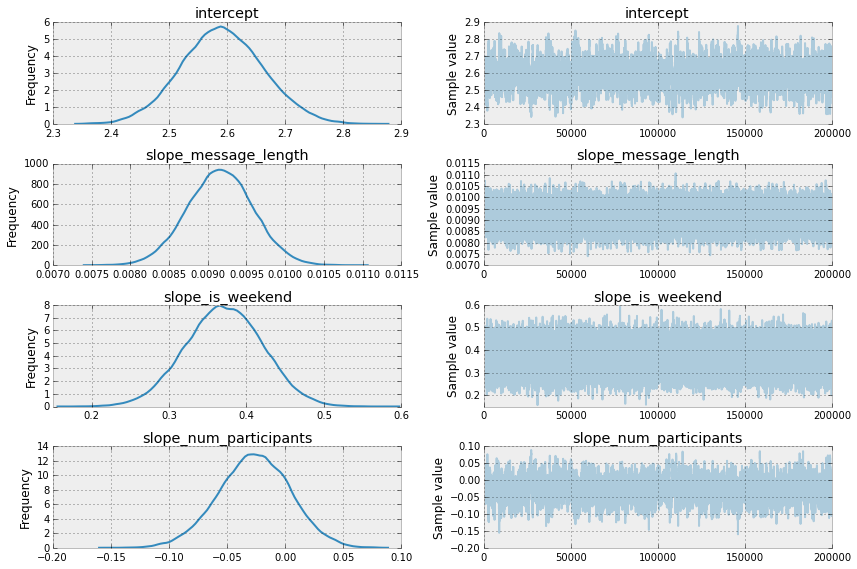

In [86]:
_ = pm.traceplot(trace)

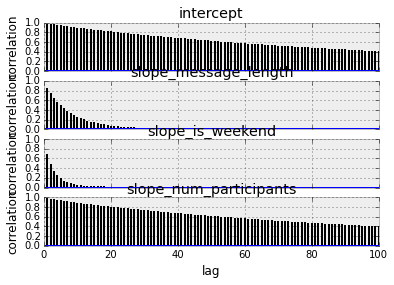

In [87]:
_ = pm.autocorrplot(trace)

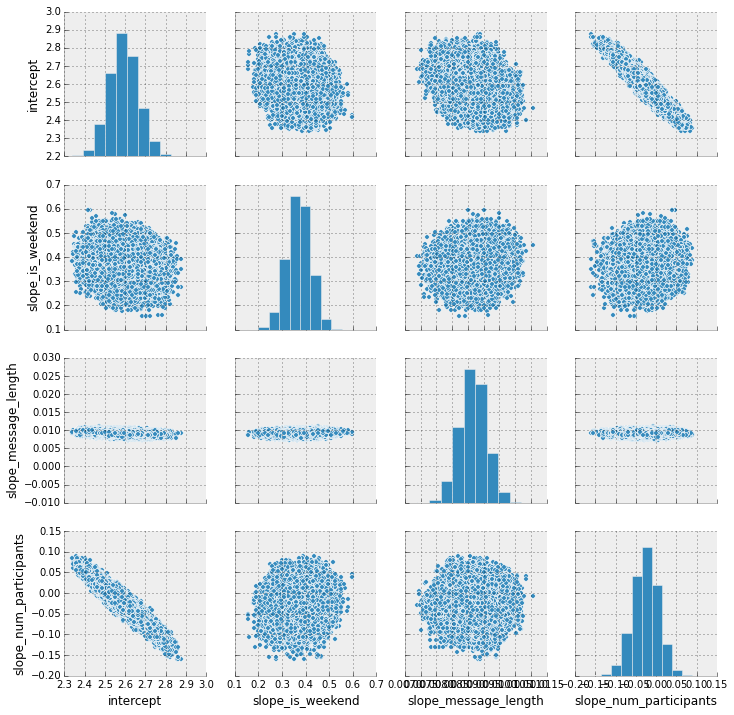

In [88]:
_ = sns.pairplot(pm.trace_to_dataframe(trace))

### Mixed effects regression
xxx: random intercept with fixed covariates

In [89]:
# Convert categorical variables to integer
le = preprocessing.LabelEncoder()
participants_idx = le.fit_transform(messages['prev_sender'])
participants = le.classes_
n_participants = len(participants)

with pm.Model() as model:

    intercept = pm.Normal('intercept', mu=0, sd=100, shape=n_participants)
    slope_message_length = pm.Normal('slope_message_length', mu=0, sd=100)
    slope_is_weekend = pm.Normal('slope_is_weekend', mu=0, sd=100)
    slope_num_participants = pm.Normal('slope_num_participants', mu=0, sd=100)
    
    mu = tt.exp(intercept[participants_idx] 
                + slope_message_length*messages.message_length 
                + slope_is_weekend*messages.is_weekend
                + slope_num_participants*messages.num_participants)
    
    y_est = pm.Poisson('y_est', mu=mu, observed=messages['time_delay_seconds'].values)
    
    start = pm.find_MAP()
    step = pm.Metropolis()
    trace = pm.sample(200000, step, start=start, progressbar=True)

 [-----------------100%-----------------] 200000 of 200000 complete in 68.0 sec

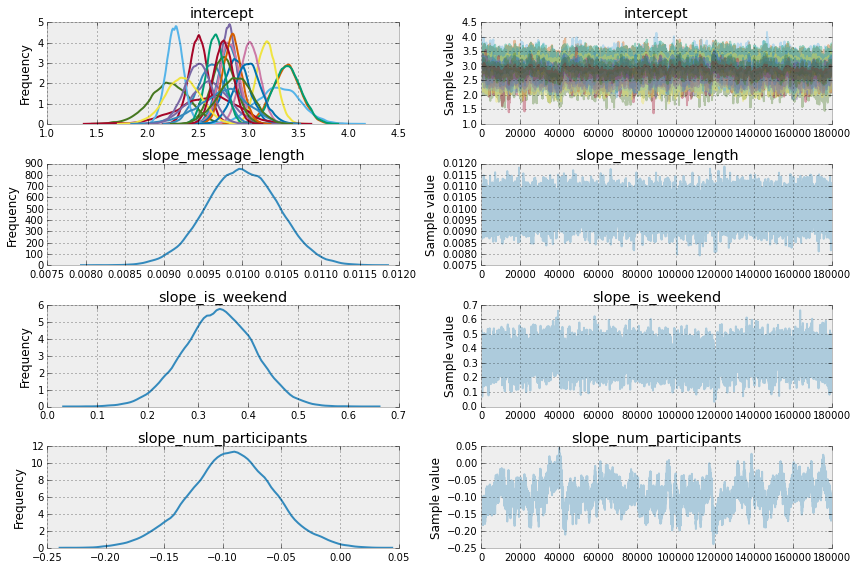

In [90]:
_ = pm.traceplot(trace[20000:])

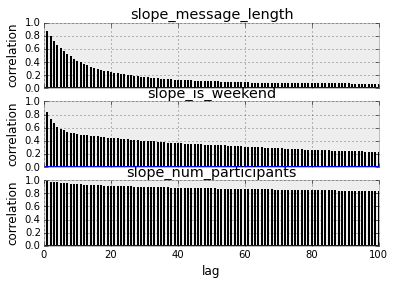

In [91]:
_ = pm.autocorrplot(trace[20000:], vars=['slope_message_length','slope_is_weekend','slope_num_participants'])

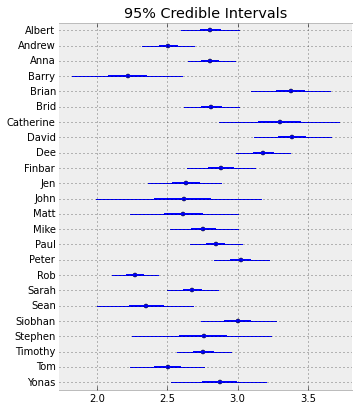

In [94]:
_ = plt.figure(figsize=(5, 6))
_ = pm.forestplot(trace[20000:], vars=['intercept'], ylabels=participants)

In [44]:
# Apply pretty styles
from IPython.core.display import HTML

def css_styling():
    styles = open("styles/custom.css", "r").read()
    return HTML(styles)
css_styling()